In [87]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [89]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [90]:
y = df['Role_encoded']

In [91]:
X

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,4.000000,4.000000,4.000000,4.000000,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,4.000000,0.340535
1,5.000000,4.000000,4.000000,4.000000,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,4.250000,0.318385
2,1.000000,4.000000,4.000000,4.000000,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,3.250000,0.355388
3,0.000000,4.000000,4.000000,4.000000,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,3.000000,0.353118
4,3.000000,4.000000,4.000000,4.000000,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,3.750000,0.304697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.636043,0.137336,0.226302,0.056456,0.704709,0.480178,0.558140,0.238608,0.800011,0.780420,0.889618,0.230480,0.655361,0.149937,0.264034,0.548746
4112,0.192270,0.135045,0.644441,0.782071,0.879181,0.726732,0.715623,0.976057,0.972935,0.027870,0.402814,0.862264,0.628395,0.586368,0.438457,0.677824
4113,0.554620,0.724794,0.255892,0.122183,0.159705,0.963999,0.414078,0.097954,0.402532,0.959647,0.816209,0.398565,0.441053,0.072179,0.414373,0.472592
4114,0.465681,0.103231,0.229899,0.595242,0.621454,0.010347,0.574015,0.435590,0.852310,0.640508,0.716231,0.458104,0.368780,0.516576,0.348513,0.519392


In [92]:
y

0        6
1        6
2        6
3        6
4        6
        ..
4111    12
4112     7
4113    13
4114     8
4115     9
Name: Role_encoded, Length: 4116, dtype: int64

In [93]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [94]:
X_scaled

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,0.666667,0.666667,0.666667,0.666667,0.716175,0.480310,0.470353,0.039195,0.743468,0.085414,0.339526,0.089076,0.230310,0.208745,0.761905,0.275382
1,0.833333,0.666667,0.666667,0.666667,0.618465,0.452624,0.376950,0.089797,0.673265,0.069821,0.353436,0.102451,0.247233,0.196407,0.809524,0.239215
2,0.166667,0.666667,0.666667,0.666667,0.815976,0.461397,0.347072,0.138287,0.631317,0.093798,0.374896,0.133504,0.287078,0.268101,0.619048,0.299636
3,0.000000,0.666667,0.666667,0.666667,0.608710,0.521567,0.403155,0.114607,0.696058,0.121356,0.338648,0.159821,0.306398,0.258183,0.571429,0.295929
4,0.500000,0.666667,0.666667,0.666667,0.783087,0.319139,0.239546,0.050586,0.619972,0.063925,0.311630,0.145777,0.302811,0.207285,0.714286,0.216865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.106007,0.022889,0.037717,0.009409,0.706248,0.479924,0.557717,0.238450,0.801059,0.783033,0.889697,0.228789,0.655399,0.149860,0.050292,0.615361
4112,0.032045,0.022508,0.107407,0.130345,0.881302,0.726702,0.715383,0.976858,0.974430,0.026006,0.402602,0.862344,0.628417,0.586858,0.083516,0.826127
4113,0.092437,0.120799,0.042649,0.020364,0.159426,0.964184,0.413489,0.097614,0.402555,0.963327,0.816244,0.397345,0.440967,0.072001,0.078928,0.491013
4114,0.077613,0.017205,0.038317,0.099207,0.622716,0.009667,0.573611,0.435689,0.853493,0.642289,0.716207,0.457051,0.368651,0.516976,0.066383,0.567430


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [96]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
y_train_pred = dt_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Decision Tree's Train acc: {train_acc}")

Decision Tree's Train acc: 0.9198055893074119


In [98]:
y_test_pred = dt_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree's Test acc: {test_acc}")

Decision Tree's Test acc: 0.7912621359223301


In [99]:
gap = train_acc - test_acc
print(f"Gap: {gap}")

Gap: 0.12854345338508177


In [100]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       312
           1       0.88      0.87      0.88       141
           2       0.97      0.93      0.95       272
           3       0.93      0.93      0.93       198
           4       0.89      0.97      0.93       142
           5       0.94      0.92      0.93       199
           6       0.95      0.86      0.90       181
           7       0.85      0.93      0.88       219
           8       0.90      0.90      0.90       133
           9       0.88      0.91      0.89       182
          10       0.83      0.89      0.86       187
          11       0.94      0.91      0.93       249
          12       0.93      0.91      0.92       210
          13       0.99      0.96      0.98       328
          14       0.94      0.91      0.93       169
          15       0.94      0.89      0.91       170

    accuracy                           0.92      3292
   macro avg       0.92   

In [101]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.67      0.62      0.64        39
           2       0.87      0.81      0.84        81
           3       0.81      0.80      0.81        65
           4       0.58      0.60      0.59        25
           5       0.79      0.78      0.78        40
           6       0.78      0.75      0.77        57
           7       0.64      0.80      0.71        45
           8       0.82      0.66      0.73        47
           9       0.78      0.78      0.78        41
          10       0.58      0.76      0.66        34
          11       0.80      0.83      0.81        58
          12       0.83      0.86      0.84        50
          13       0.93      0.87      0.90        87
          14       0.86      0.77      0.81        48
          15       0.84      0.82      0.83        39

    accuracy                           0.79       824
   macro avg       0.77   

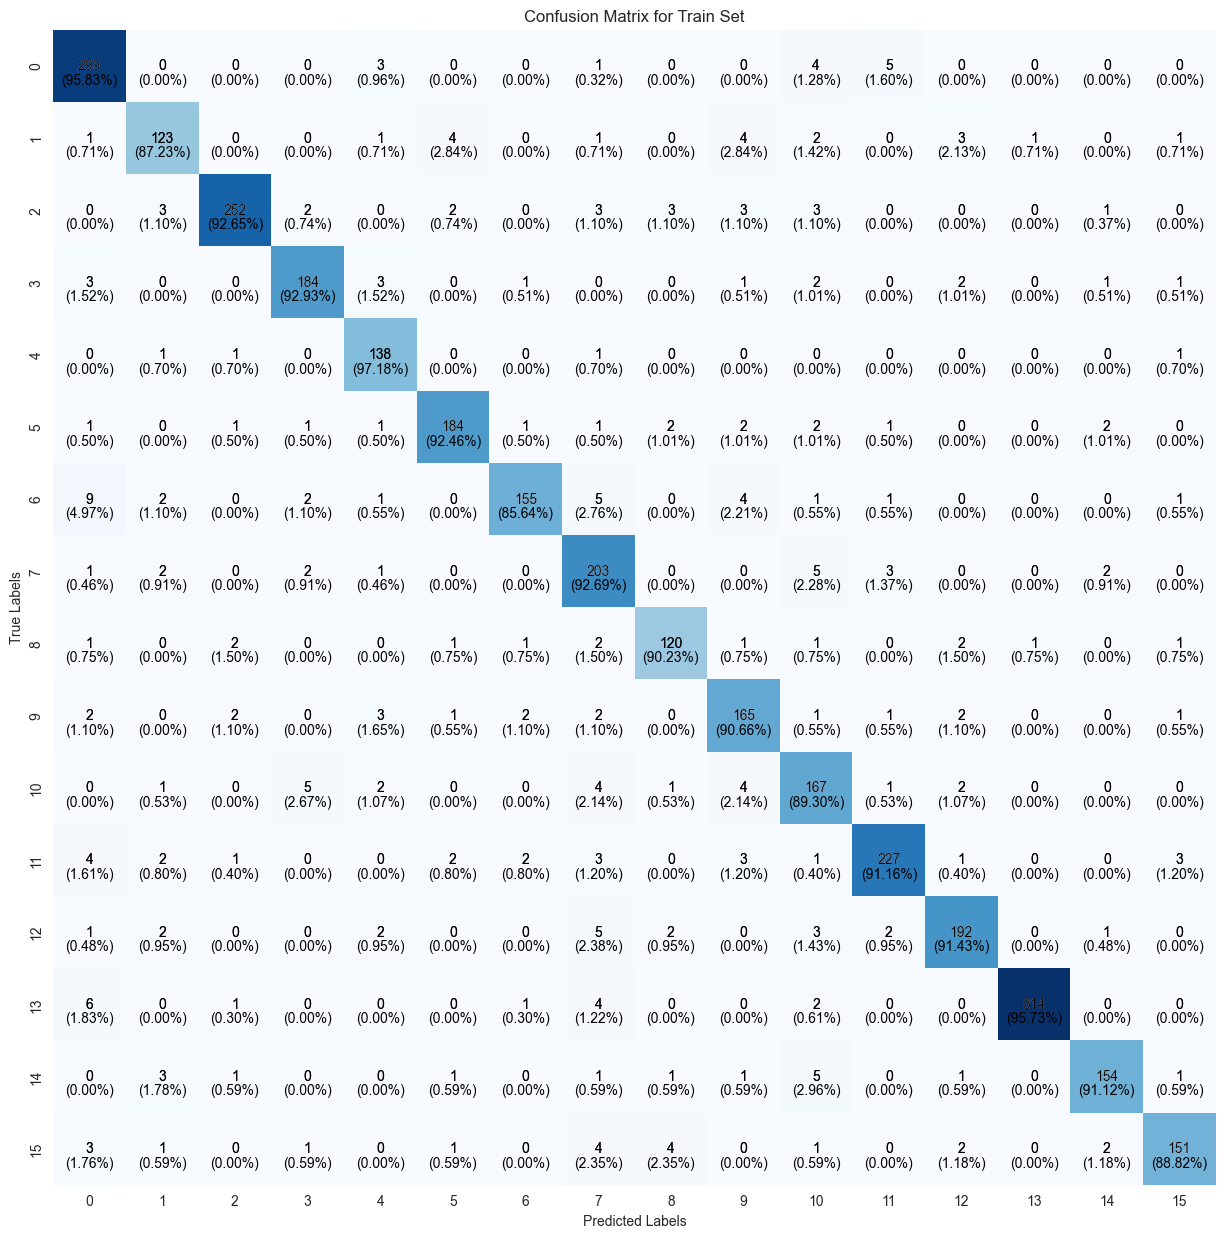

In [102]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

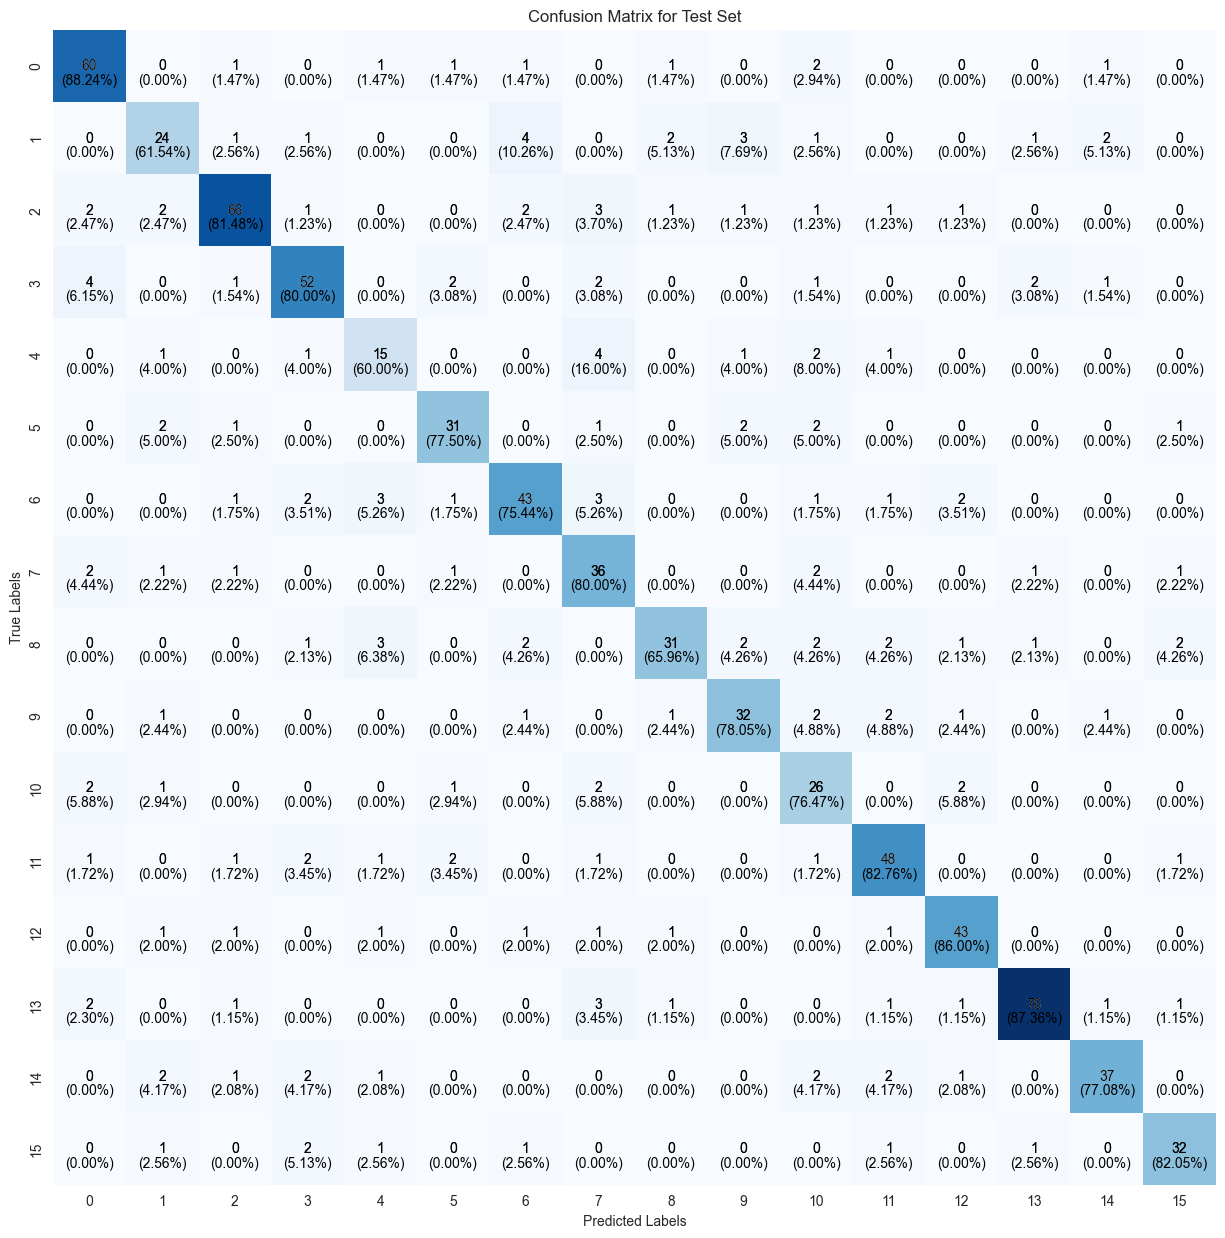

In [103]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [104]:
feature_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Yếu tố quan trọng nhất đối với Decision Tree:")
print(feature_imp.head(5))


Top 5 Yếu tố quan trọng nhất đối với Decision Tree:
soft_skill_score      0.121569
Openness              0.112628
Self-enhancement      0.085249
Extraversion          0.073531
Self-transcendence    0.070303
dtype: float64


In [105]:
joblib.dump(dt_model, '../../src/career_prediction_model.pkl')

['../../src/career_prediction_model.pkl']

In [106]:
joblib.dump(scaler, '../../src/scaler.pkl')

['../../src/scaler.pkl']

-------------------------------------------------------------------------------------------------------------------------------------

In [70]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [71]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [72]:
y = df['Role_encoded']

In [73]:
X

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,4.000000,4.000000,4.000000,4.000000,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746
1,5.000000,4.000000,4.000000,4.000000,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424
2,1.000000,4.000000,4.000000,4.000000,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024
3,0.000000,4.000000,4.000000,4.000000,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119
4,3.000000,4.000000,4.000000,4.000000,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.636043,0.137336,0.226302,0.056456,0.704709,0.480178,0.558140,0.238608,0.800011,0.780420,0.889618,0.230480,0.655361,0.149937
4112,0.192270,0.135045,0.644441,0.782071,0.879181,0.726732,0.715623,0.976057,0.972935,0.027870,0.402814,0.862264,0.628395,0.586368
4113,0.554620,0.724794,0.255892,0.122183,0.159705,0.963999,0.414078,0.097954,0.402532,0.959647,0.816209,0.398565,0.441053,0.072179
4114,0.465681,0.103231,0.229899,0.595242,0.621454,0.010347,0.574015,0.435590,0.852310,0.640508,0.716231,0.458104,0.368780,0.516576


In [74]:
y

0        6
1        6
2        6
3        6
4        6
        ..
4111    12
4112     7
4113    13
4114     8
4115     9
Name: Role_encoded, Length: 4116, dtype: int64

In [75]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [76]:
X_scaled

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,0.666667,0.666667,0.666667,0.666667,0.716175,0.480310,0.470353,0.039195,0.743468,0.085414,0.339526,0.089076,0.230310,0.208745
1,0.833333,0.666667,0.666667,0.666667,0.618465,0.452624,0.376950,0.089797,0.673265,0.069821,0.353436,0.102451,0.247233,0.196407
2,0.166667,0.666667,0.666667,0.666667,0.815976,0.461397,0.347072,0.138287,0.631317,0.093798,0.374896,0.133504,0.287078,0.268101
3,0.000000,0.666667,0.666667,0.666667,0.608710,0.521567,0.403155,0.114607,0.696058,0.121356,0.338648,0.159821,0.306398,0.258183
4,0.500000,0.666667,0.666667,0.666667,0.783087,0.319139,0.239546,0.050586,0.619972,0.063925,0.311630,0.145777,0.302811,0.207285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.106007,0.022889,0.037717,0.009409,0.706248,0.479924,0.557717,0.238450,0.801059,0.783033,0.889697,0.228789,0.655399,0.149860
4112,0.032045,0.022508,0.107407,0.130345,0.881302,0.726702,0.715383,0.976858,0.974430,0.026006,0.402602,0.862344,0.628417,0.586858
4113,0.092437,0.120799,0.042649,0.020364,0.159426,0.964184,0.413489,0.097614,0.402555,0.963327,0.816244,0.397345,0.440967,0.072001
4114,0.077613,0.017205,0.038317,0.099207,0.622716,0.009667,0.573611,0.435689,0.853493,0.642289,0.716207,0.457051,0.368651,0.516976


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [78]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
y_train_pred = dt_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Decision Tree's Train acc: {train_acc}")

Decision Tree's Train acc: 0.9465370595382746


In [80]:
y_test_pred = dt_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree's Test acc: {test_acc}")

Decision Tree's Test acc: 0.7803398058252428


In [81]:
gap = train_acc - test_acc
print(f"Gap: {gap}")

Gap: 0.16619725371303185


In [82]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       312
           1       0.92      0.91      0.92       141
           2       0.90      0.97      0.93       272
           3       0.98      0.95      0.97       198
           4       0.99      0.96      0.98       142
           5       0.96      0.96      0.96       199
           6       0.92      0.90      0.91       181
           7       0.91      0.97      0.94       219
           8       0.81      0.92      0.86       133
           9       0.99      0.93      0.96       182
          10       0.86      0.93      0.89       187
          11       1.00      0.96      0.98       249
          12       0.91      0.94      0.93       210
          13       1.00      0.98      0.99       328
          14       0.99      0.92      0.95       169
          15       0.97      0.91      0.94       170

    accuracy                           0.95      3292
   macro avg       0.94   

In [83]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        68
           1       0.52      0.59      0.55        39
           2       0.86      0.79      0.83        81
           3       0.83      0.83      0.83        65
           4       0.59      0.68      0.63        25
           5       0.82      0.80      0.81        40
           6       0.75      0.74      0.74        57
           7       0.81      0.76      0.78        45
           8       0.68      0.68      0.68        47
           9       0.88      0.73      0.80        41
          10       0.57      0.74      0.64        34
          11       0.82      0.78      0.80        58
          12       0.80      0.88      0.84        50
          13       0.89      0.85      0.87        87
          14       0.80      0.77      0.79        48
          15       0.73      0.82      0.77        39

    accuracy                           0.78       824
   macro avg       0.76   

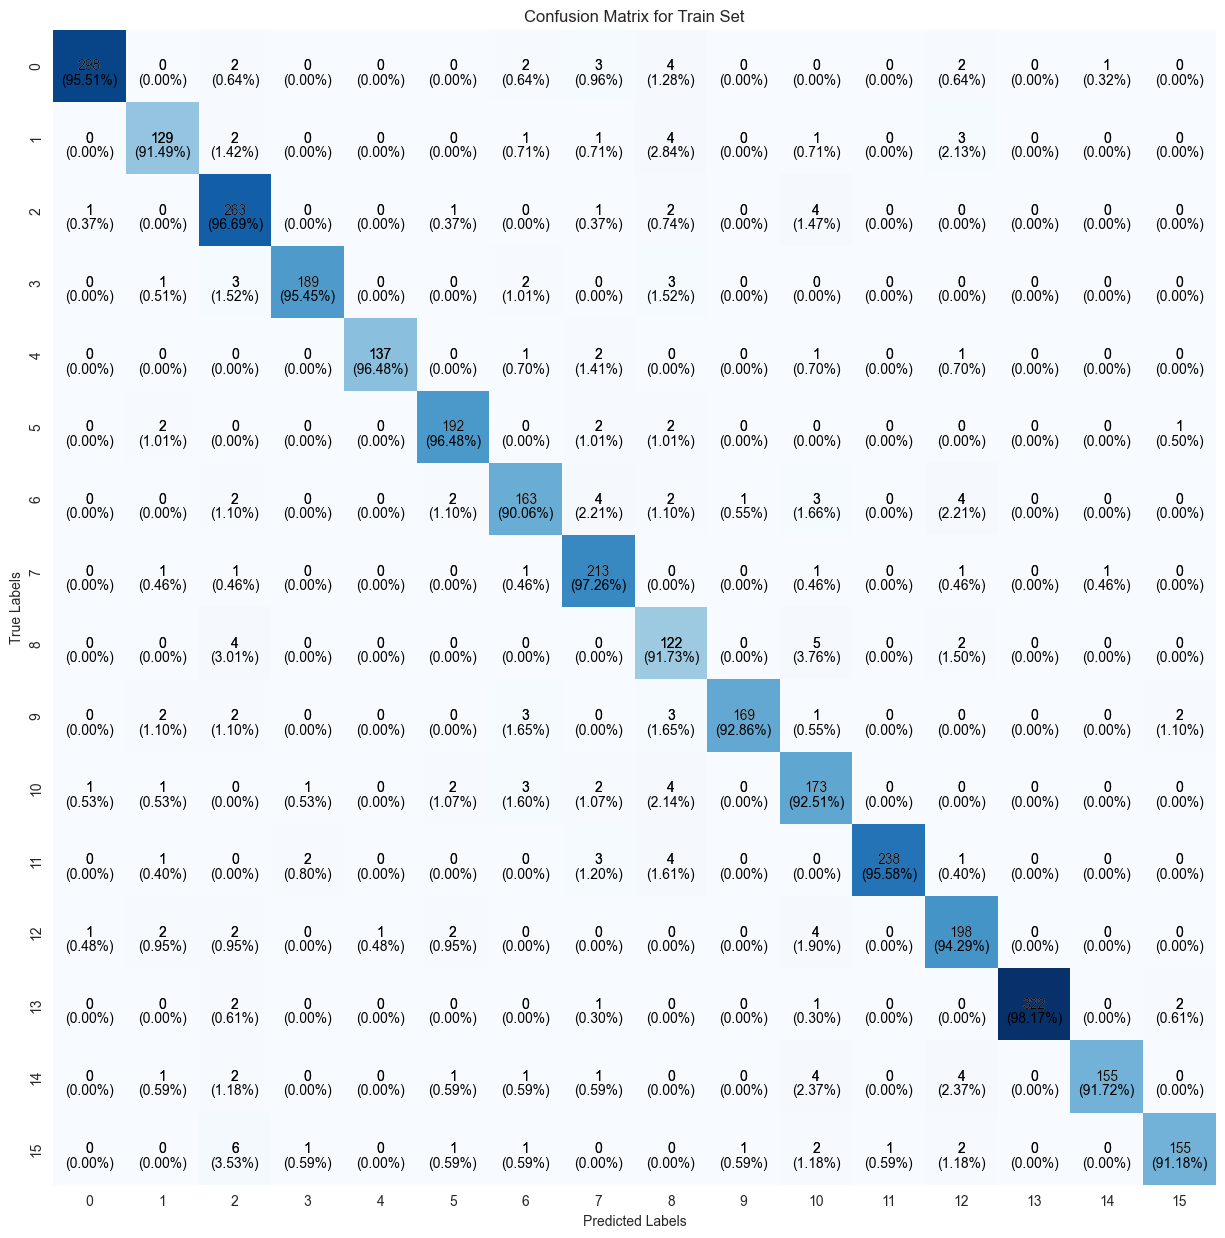

In [84]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

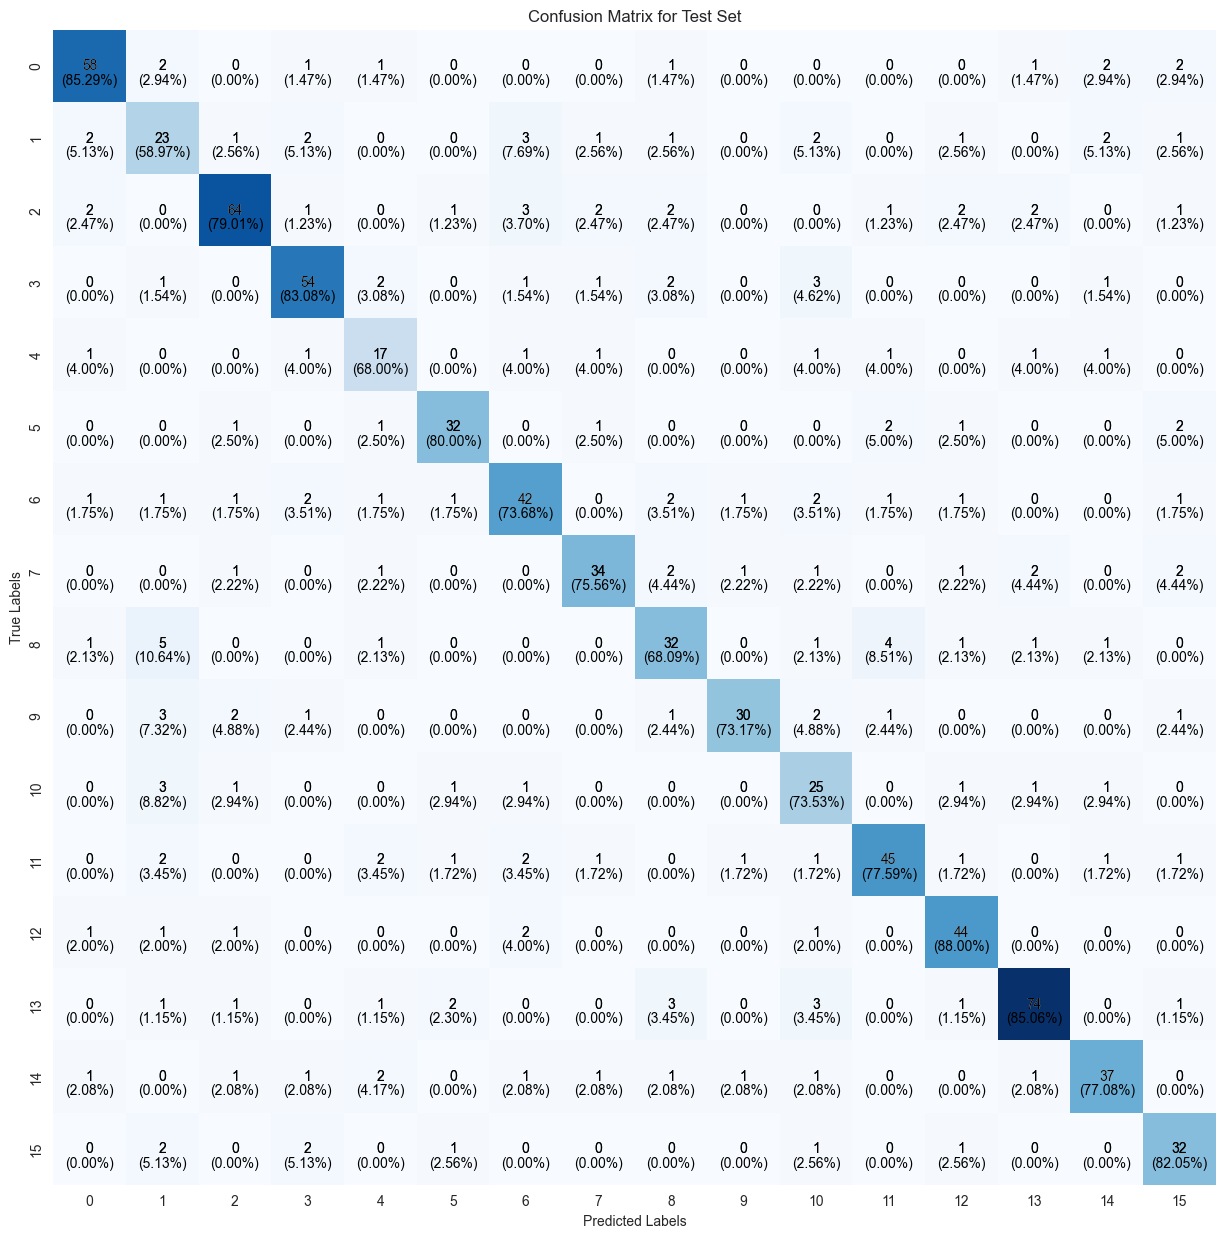

In [85]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [86]:
feature_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Yếu tố quan trọng nhất đối với Decision Tree:")
print(feature_imp.head(5))


Top 5 Yếu tố quan trọng nhất đối với Decision Tree:
Self-transcendence    0.212335
Agreeableness         0.108126
Conversation          0.097106
Project Management    0.090689
Self-enhancement      0.079083
dtype: float64
